In [1]:
#load lib
import os
import pandas as pd
import numpy
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#set working directory
os.chdir("C:/Users/HP/Desktop/Bikerent")

In [3]:
#load data 
bikedata=pd.read_csv("Bike.csv")

In [4]:
bikedata.shape

(731, 16)

In [5]:
#check data type
bikedata.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
bikedata.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

From above it is easy to understand that dteday,season,year,month,holiday,weekdays,workingday
and weathwesit doesnot have proper datatype. So, need to change data type as per requirement


In [7]:
# data type change
bikedata['season']=bikedata['season'].astype(str)
bikedata['yr']=bikedata['yr'].astype(str)
bikedata['mnth']=bikedata['mnth'].astype(str)
bikedata['holiday']=bikedata['holiday'].astype(str)
bikedata['weekday']=bikedata['weekday'].astype(str)
bikedata['workingday']=bikedata['workingday'].astype(str)
bikedata['weathersit']=bikedata['weathersit'].astype(str)
bikedata['dteday']=pd.to_datetime(bikedata['dteday'])


In [8]:
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
bikedata.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

From above we understood that data col such as instant,dteday dont contribute much to the dependent variable 

In [10]:
#Extract day from dteday to check relation between indepndent and dependent variables
bikedata['day'] = bikedata['dteday'].dt.day

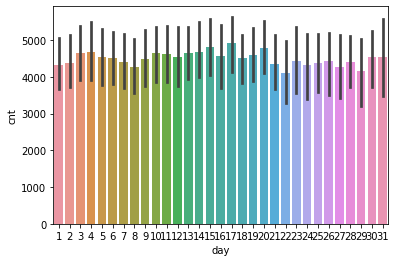

In [11]:
sb.barplot(x=bikedata['day'],y=bikedata['cnt'])

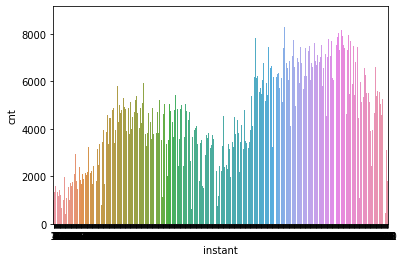

In [12]:
sb.barplot(x=bikedata['instant'],y=bikedata['cnt'])

Now it is clear that 'instant','dteday' doesnot contribute to cnt.
cnt is combination of 'registerd' and 'casual'.
so we can drop such col from dataset

In [13]:
bikedata=bikedata.drop(['day','instant','dteday','casual','registered'],axis=1)

In [14]:
bikedata.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

# Missing value

In [15]:
print(bikedata.isnull().sum())

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


It is clear that there is no missing value in dataset 

# Outlier analysis

Now divide col as numeric and categoric

In [16]:
# 
numeric_col = ['temp','atemp','hum','windspeed']
categorical_col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']

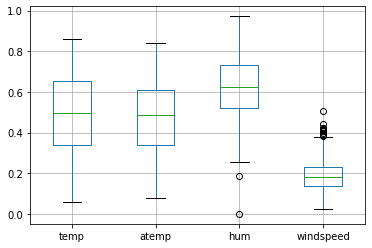

In [17]:
bikedata.boxplot(numeric_col)

# Removeal of outliers

From above boxplot konw that there are outliers in windspeed 
now, replace outliers with NULL

In [18]:
#Replace the outlier data values with NULL
for x in ['hum','windspeed']:
    q75,q25 = numpy.percentile(bikedata.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    bikedata.loc[bikedata[x] < min,x] = numpy.nan
    bikedata.loc[bikedata[x] > max,x] = numpy.nan

In [19]:
bikedata.isnull().sum()

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
cnt            0
dtype: int64

In [20]:
bikedata = bikedata.dropna(axis = 0)

In [21]:
bikedata.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#  Feature selection

In [22]:
numeric_col

['temp', 'atemp', 'hum', 'windspeed']

In [23]:
#Using Correlation analysis to depict the relationship between the numeric/continuous data variables
corr_matrix = bikedata.loc[:,numeric_col].corr()
print(corr_matrix)



               temp     atemp       hum  windspeed
temp       1.000000  0.991738  0.114191  -0.140169
atemp      0.991738  1.000000  0.126587  -0.166038
hum        0.114191  0.126587  1.000000  -0.204496
windspeed -0.140169 -0.166038 -0.204496   1.000000


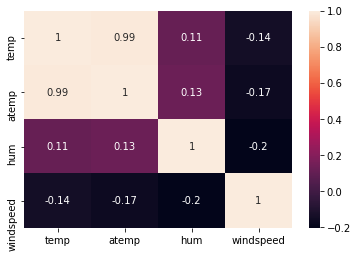

In [24]:
sb.heatmap(corr_matrix, annot=True)

From above heatmap it clear that atemp and temp are highly corealted so we can derop any one of them

In [25]:
bikedata = bikedata.drop(['atemp'],axis=1)

In [26]:
bikedata.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


feature selection for categorical variables

In [27]:
categorical_col =['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for x in categorical_col:
    model = ols('cnt' + '~' + x, data = bikedata).fit() #Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print(result_anova)

             df        sum_sq       mean_sq           F        PR(>F)
season      3.0  9.218466e+08  3.072822e+08  124.840203  5.433284e-65
Residual  713.0  1.754981e+09  2.461404e+06         NaN           NaN
             df        sum_sq       mean_sq           F        PR(>F)
yr          1.0  8.813271e+08  8.813271e+08  350.959951  5.148657e-64
Residual  715.0  1.795501e+09  2.511190e+06         NaN           NaN
             df        sum_sq       mean_sq          F        PR(>F)
mnth       11.0  1.042307e+09  9.475520e+07  40.869727  2.557743e-68
Residual  705.0  1.634521e+09  2.318469e+06        NaN           NaN
             df        sum_sq       mean_sq        F    PR(>F)
holiday     1.0  1.377098e+07  1.377098e+07  3.69735  0.054896
Residual  715.0  2.663057e+09  3.724555e+06      NaN       NaN
             df        sum_sq       mean_sq         F    PR(>F)
weekday     6.0  1.757122e+07  2.928537e+06  0.781896  0.584261
Residual  710.0  2.659257e+09  3.745432e+06       NaN   

From above it is clear that p value of holiday,weekday,workingday is less than 0.5
so,we can drop them

In [29]:
bikedata = bikedata.drop(['weekday','workingday'],axis=1)

In [30]:
bikedata.dtypes

season         object
yr             object
mnth           object
holiday        object
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

# Feature Scaling

 Before applying feature scaling techniques, we need to check whether the data is normalized or not. 
 
If the data is normalized, we do not apply any scaling to it.

If the data is skewed i.e. not in a normalized form, then we apply scaling technique to scale the data.

In [31]:
num_col = ['temp','hum','windspeed']

Skewness Test,Displot(curve),histogram used to check normailization of data. 

In [32]:
#Skewness Test
from scipy.stats import skew
for x in num_col:
    print(x)
    skew_test = skew(bikedata.loc[:,x])
    print(skew_test)

temp
-0.0690698243507108
hum
0.05235661609568474
windspeed
0.4400548001440976


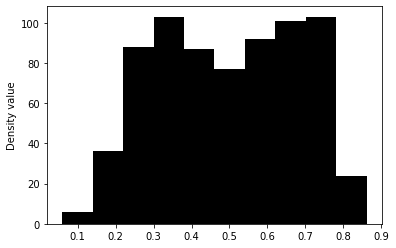

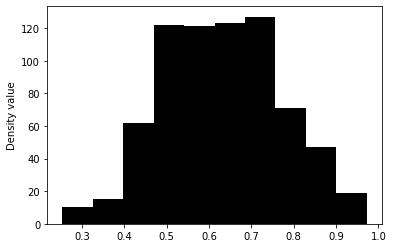

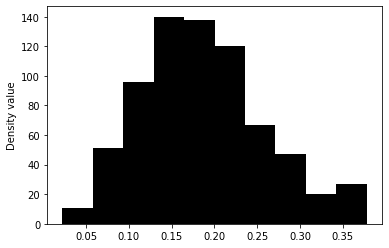

In [33]:
# Histogram 
for x in num_col:
    plt.hist(bikedata[x],color = 'black')
    plt.ylabel("Density value")
    plt.show()

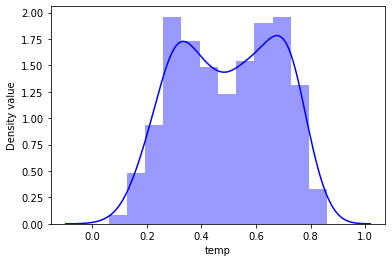

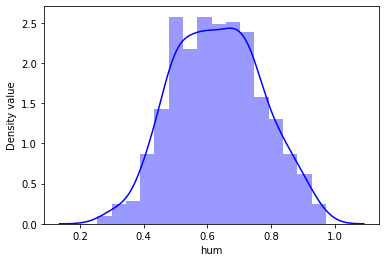

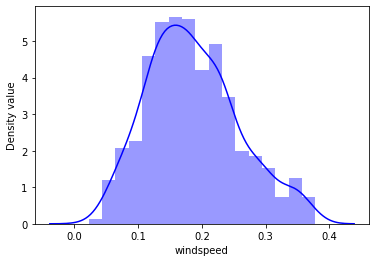

In [34]:
# DistPlot
for x in num_col:
    sb.distplot(bikedata[x],color = 'Blue')
    plt.ylabel("Density value")
    plt.show()

Data sampling 
Spliting data into two part training and testing 

In [35]:
bike = bikedata.copy()

In [36]:
categorical_col_updated = ['season','yr','mnth','weathersit','holiday']

In [37]:
bike = pd.get_dummies(bike, columns = categorical_col_updated) 

In [38]:
bike.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_10', 'mnth_11', 'mnth_12',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'holiday_0',
       'holiday_1'],
      dtype='object')

In [39]:
#Separating the depenedent and independent data variables into two dataframes.
from sklearn.model_selection import train_test_split 
X = bike.drop(['cnt'],axis=1) 
Y = bike['cnt']

In [40]:
X # Independent variables

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,weathersit_1,weathersit_2,weathersit_3,holiday_0,holiday_1
0,0.344167,0.805833,0.160446,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.696087,0.248539,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
2,0.196364,0.437273,0.248309,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0.200000,0.590435,0.160296,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0.226957,0.436957,0.186900,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.254167,0.652917,0.350133,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
727,0.253333,0.590000,0.155471,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
728,0.253333,0.752917,0.124383,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
729,0.255833,0.483333,0.350754,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [41]:
Y # Dependent variable

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 717, dtype: int64

In [42]:
# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

In [43]:
X_train

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,weathersit_1,weathersit_2,weathersit_3,holiday_0,holiday_1
696,0.291667,0.786667,0.237562,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
17,0.216667,0.861667,0.146775,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
271,0.616667,0.699167,0.172883,0,0,0,1,1,0,0,...,0,0,0,0,1,1,0,0,1,0
324,0.447500,0.910000,0.138054,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
370,0.334167,0.542083,0.167908,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,0.326667,0.556667,0.374383,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
197,0.719167,0.604167,0.245033,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
641,0.657500,0.793750,0.066546,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
571,0.724167,0.450000,0.164800,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [44]:
X_test

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,weathersit_1,weathersit_2,weathersit_3,holiday_0,holiday_1
345,0.238333,0.670833,0.063450,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
147,0.655833,0.729583,0.230092,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
248,0.540000,0.886957,0.343943,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
241,0.639167,0.548333,0.125008,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
483,0.376667,0.489583,0.129975,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.348333,0.734583,0.092054,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
102,0.412500,0.819167,0.250617,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
518,0.583333,0.549167,0.186562,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
715,0.362500,0.838750,0.100742,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [45]:
Y_train

696    3959
17      683
271    4839
324    2765
370    4098
       ... 
720    3623
197    5302
641    7572
571    8173
697    5260
Name: cnt, Length: 573, dtype: int64

In [46]:
Y_test

345    3310
147    4758
248    2710
241    5204
483    4220
       ... 
309    3649
102    2162
518    8120
715    3786
316    3717
Name: cnt, Length: 144, dtype: int64

# Modeling

Defining error matrix
1.MAPE method

In [47]:
import numpy as np
def MAPE(Y_actual,Y_Predicted):
    Mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return Mape

2.R root square matrix

In [48]:
import numpy as np
from sklearn import metrics
def R_square(Y_actual,Y_Predicted):
    R_sq = metrics.r2_score(Y_actual,Y_Predicted)
    return R_sq

Model 1 : linear regression

In [49]:
#Building the Linear Regression Model on our dataset
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(X_train , Y_train)

In [50]:
LR_Train_predict = linear_model.predict(X_train) #Predictions on Training data

In [51]:
LR_Test_predict = linear_model.predict(X_test) #Predictions on Testing data

In [52]:
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE = MAPE(Y_test,LR_Test_predict)

In [53]:
# Using R-SQUARE error metrics to check for the error rate and accuracy level
LR_R = R_square(Y_test,LR_Test_predict)

In [54]:
Accuracy = 100 - LR_MAPE

In [55]:
print("MAPE: ",LR_MAPE)
print("R-Square: ",LR_R)
print('Accuracy of Linear Regression: {:0.2f}%.'.format(Accuracy))

MAPE:  16.71874517319444
R-Square:  0.8744789006388366
Accuracy of Linear Regression: 83.28%.


model 2: Decision Tree

In [56]:
#Building the Decision Tree Model on our dataset
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)

In [57]:
DT_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [58]:
DT_predict = DT_model.predict(X_test) #Predictions on Testing data

In [59]:
# Using MAPE error metrics to check for the error rate and accuracy level
DT_MAPE = MAPE(Y_test,DT_predict)

In [60]:
# Using R-SQUARE error metrics to check for the error rate and accuracy level
DT_R = R_square(Y_test,DT_predict)

In [61]:
Accuracy_DT = 100 - DT_MAPE

In [62]:
print("MAPE: ",DT_MAPE)
print("R-Square: ",DT_R)
print('Accuracy of Decision Tree model: {:0.2f}%.'.format(Accuracy_DT))

MAPE:  18.076637888252055
R-Square:  0.8754469606492964
Accuracy of Decision Tree model: 81.92%.


Model 3 : Random Forest

In [63]:
#Building the Decision Tree Model on our dataset
from sklearn.ensemble import RandomForestRegressor
Random_model = RandomForestRegressor(n_estimators=300).fit(X_train,Y_train)

In [64]:
Random_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [65]:
Random_predict = Random_model.predict(X_test) #Predictions on Testing data

In [66]:
# Using MAPE error metrics to check for the error rate and accuracy level
Random_MAPE = MAPE(Y_test,Random_predict)

In [67]:
# Using R-SQUARE error metrics to check for the error rate and accuracy level
Random_R = R_square(Y_test,Random_predict)

In [68]:
Accuracy_Random = 100 - Random_MAPE

In [69]:
print("MAPE: ",Random_MAPE)
print("R-Square: ",Random_R)
print('Accuracy of Random Forest model: {:0.2f}%.'.format(Accuracy_Random))

MAPE:  16.023513892360224
R-Square:  0.9190764725887397
Accuracy of Random Forest model: 83.98%.


Model 4 : KNN

In [70]:
#Building the KNN Model on our dataset
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_train,Y_train)

In [71]:
KNN_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [72]:
KNN_predict = KNN_model.predict(X_test) #Predictions on Testing data

In [73]:
# Using MAPE error metrics to check for the error rate and accuracy level
KNN_MAPE = MAPE(Y_test,KNN_predict)

In [74]:
# Using R-SQUARE error metrics to check for the error rate and accuracy level
KNN_R = R_square(Y_test,KNN_predict)

In [75]:
Accuracy_KNN = 100 - KNN_MAPE

In [76]:
print("MAPE: ",KNN_MAPE)
print("R-Square: ",KNN_R)
print('Accuracy of KNN model: {:0.2f}%.'.format(Accuracy_KNN))

MAPE:  17.443668778014253
R-Square:  0.8827864825099236
Accuracy of KNN model: 82.56%.


In [77]:
bike.shape

(717, 27)

In [78]:
##Create a dataframe for actual values and predicted values
Bike_result = pd.DataFrame({'Actual_count': Y_test, 'Predicted_count':Random_predict})
Bike_result

,Actual_count,Predicted_count
345,3310,2503.110000
147,4758,4644.196667
248,2710,2796.966667
241,5204,4921.426667
483,4220,5268.570000
...,...,...
309,3649,3506.346667
102,2162,2659.226667
518,8120,7212.606667
715,3786,4461.363333


In [79]:
Bike_result.to_csv("BIKE_RESULT.csv",index=False)